# KBinsDiscretizer

## Konsep Dikritisasi
### Pengertian Dikstritisasi

Diskritisasi adalah proses mengubah data numerik atau kontinu menjadi bentuk data kategorikal atau diskrit. Dalam data numerik, nilai bisa sangat bervariasi dan tak terbatas (misalnya 4.21, 5.37, 7.89, dst.), sementara dalam bentuk diskrit, nilai akan dibagi ke dalam kategori tertentu (misalnya "Rendah", "Sedang", "Tinggi").

Dengan kata lain, diskritisasi mengubah data kuantitatif menjadi kualitatif atau kategori yang lebih terbatas dan mudah dipahami maupun diproses oleh algoritma tertentu.

### Tujuan Diskritisasi
1. Menyederhanakan data agar lebih mudah dianalisis dan divisualisasikan.
2. Mengurangi noise pada data numerik yang kompleks.
3. Memudahkan interpretasi data oleh manusia.
4. Meningkatkan performa algoritma
klasifikasi tertentu, terutama yang dirancang untuk data kategorikal seperti:

  *   Naive Bayes (CategoricalNB)
  *   Decision Tree

5. Persiapan untuk teknik data mining atau machine learning yang mengharuskan data dalam bentuk diskrit.

### Metode Dikritisasi

Beberapa metode umum diskritisasi:
1.  Equal Width Binning

*   Membagi range nilai menjadi beberapa interval dengan lebar yang sama.
*   Contoh: range 0–100 dibagi ke 4 kategori → masing-masing 25 nilai.

2.  Equal Frequency Binning
*  Membagi data sehingga setiap kelompok memiliki jumlah data yang sama.

3. Diskritisasi Manual (berbasis domain)
*  Berdasarkan aturan atau pengetahuan domain tertentu, misalnya nilai ujian:
  *  <60: Gagal
  * 60–80: Cukup
  *  80: Baik

4.  K-Means Clustering (Diskritisasi Berdasarkan Pola)
  *  Pendekatan data-driven: KMeans digunakan untuk mencari kelompok alami (cluster) dalam distribusi data.
  * Setiap nilai numerik diberi label berdasarkan cluster-nya (misalnya cluster 0, 1, 2).
  *  Kelebihannya: lebih adaptif terhadap pola dan distribusi data.




## Data iris sebelum didikritisasi

###  Naive Bayes – Data Asli (Tanpa Diskritisasi)

In [1]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

# Load data asli
iris = load_iris()
X = iris.data
y = iris.target

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model Naive Bayes
model_nb = GaussianNB()
model_nb.fit(X_train, y_train)
y_pred_nb = model_nb.predict(X_test)

# Akurasi
accuracy_nb = accuracy_score(y_test, y_pred_nb)
print(f"Akurasi Naive Bayes (data asli): {accuracy_nb:.4f}")


ModuleNotFoundError: No module named 'pandas'

###  Decision Tree – Data Asli (Tanpa Diskritisasi)

In [2]:
from sklearn.tree import DecisionTreeClassifier

# Load data tetap sama seperti sebelumnya
# Split data juga sama

# Model Decision Tree
model_dt = DecisionTreeClassifier(random_state=42)
model_dt.fit(X_train, y_train)
y_pred_dt = model_dt.predict(X_test)

# Akurasi
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print(f"Akurasi Decision Tree (data asli): {accuracy_dt:.4f}")


Akurasi Decision Tree (data asli): 1.0000


## Data iris setelah didikritisasi

### Dikstritisasi fitur data iris menggunakan K-means Clustering

*   Fitur sepal length (cm) → 4
*  Fitur petal length (cm) → 4
*   Fitur sepal width (cm) → 3
*  Fitur petal width (cm) → 3






### Diskritisasi Data Iris Menggunakan KBinsDiscretizer dengan Strategi KMeans

In [3]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.preprocessing import MinMaxScaler, KBinsDiscretizer

# 1. Load data Iris
iris = load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['target'] = iris.target

# 2. Normalisasi fitur (opsional, bisa dilewati karena KBinsDiscretizer tidak butuh scaling)
scaler = MinMaxScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df[iris.feature_names]), columns=iris.feature_names)

# 3. Inisialisasi KBinsDiscretizer
discretizer = KBinsDiscretizer(
    n_bins=[4, 3, 4, 3],        # Jumlah bin per fitur
    encode='ordinal',          # Output berupa angka kategori: 0,1,2,...
    strategy='kmeans'          # Gunakan strategi kmeans seperti kode sebelumnya
)

# 4. Fit dan transform data
X_disc = discretizer.fit_transform(df_scaled)

# 5. Buat DataFrame hasil diskritisasi
df_disc = pd.DataFrame(X_disc, columns=[
    'sepal length (cat)',
    'sepal width (cat)',
    'petal length (cat)',
    'petal width (cat)'
])
df_disc['target'] = df['target']

# 6. Tampilkan hasil
print(df_disc.head())

# 7. Simpan ke Excel (opsional)
df_disc.to_excel("iris_kbins_discretized.xlsx", index=False)

   sepal length (cat)  sepal width (cat)  petal length (cat)  \
0                 0.0                2.0                 0.0   
1                 0.0                1.0                 0.0   
2                 0.0                1.0                 0.0   
3                 0.0                1.0                 0.0   
4                 0.0                2.0                 0.0   

   petal width (cat)  target  
0                0.0       0  
1                0.0       0  
2                0.0       0  
3                0.0       0  
4                0.0       0  


### Visualisasi Batas Bin

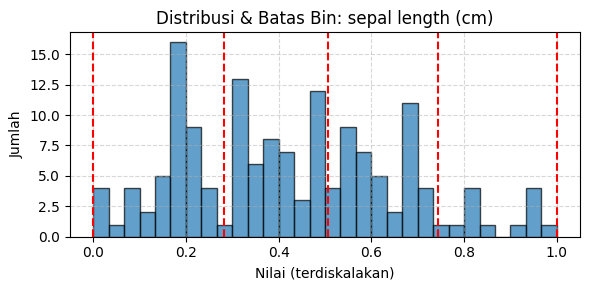

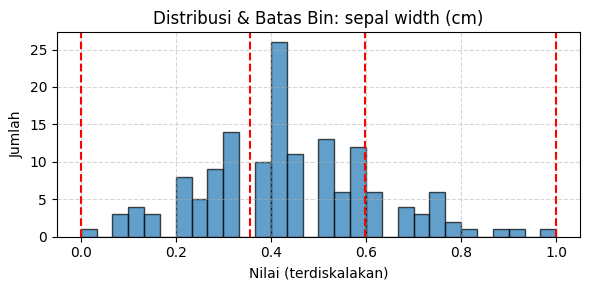

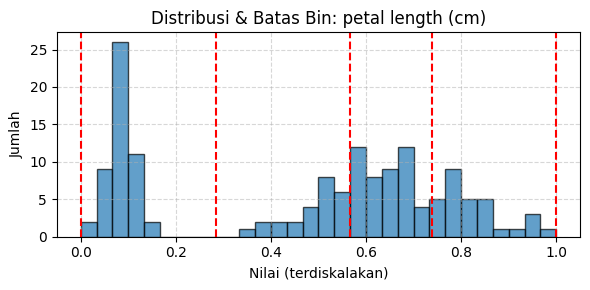

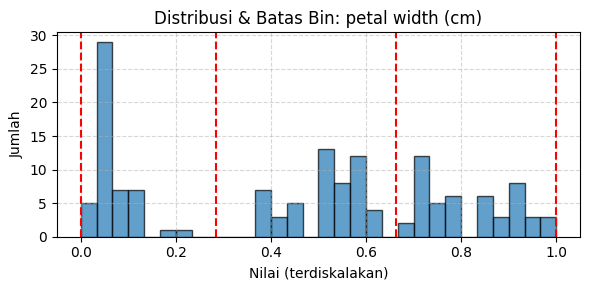

Batas bin untuk fitur 'sepal length (cm)': [0.         0.28199251 0.50680272 0.74343712 1.        ]
Batas bin untuk fitur 'sepal width (cm)': [0.         0.35507024 0.59817308 1.        ]
Batas bin untuk fitur 'petal length (cm)': [0.         0.28355932 0.56719397 0.73832392 1.        ]
Batas bin untuk fitur 'petal width (cm)': [0.         0.28522436 0.6627938  1.        ]


In [8]:
import matplotlib.pyplot as plt
import numpy as np

# 5a. Visualisasi batas bin untuk setiap fitur
feature_names = iris.feature_names
bin_edges = discretizer.bin_edges_

for i, feature in enumerate(feature_names):
    plt.figure(figsize=(6, 3))
    plt.hist(df_scaled[feature], bins=30, alpha=0.7, edgecolor='black')

    for edge in bin_edges[i]:
        plt.axvline(edge, color='red', linestyle='--')

    plt.title(f"Distribusi & Batas Bin: {feature}")
    plt.xlabel("Nilai (terdiskalakan)")
    plt.ylabel("Jumlah")
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()

# 5b. Tampilkan informasi batas bin numerik
for i, feature in enumerate(feature_names):
    print(f"Batas bin untuk fitur '{feature}': {bin_edges[i]}")

## Klasifikasi Naive Bayes setelah Diskritisasi

### Klasifikasi Data Iris Menggunakan Categorical Naive Bayes dan Diskritisasi dengan KBinsDiscretizer

In [4]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.preprocessing import MinMaxScaler, KBinsDiscretizer, OrdinalEncoder
from sklearn.naive_bayes import CategoricalNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# 1. Load dataset
iris = load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['target'] = iris.target

# 2. Normalisasi fitur (opsional tapi umum dilakukan sebelum diskritisasi)
scaler = MinMaxScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df[iris.feature_names]), columns=iris.feature_names)

# 3. Diskritisasi menggunakan KBinsDiscretizer
discretizer = KBinsDiscretizer(n_bins=[4, 3, 4, 3], encode='ordinal', strategy='kmeans')  # Bisa ganti ke 'uniform' atau 'quantile'
X_binned = discretizer.fit_transform(df_scaled)

# 4. Buat DataFrame diskret dan gabungkan target
df_cat = pd.DataFrame(X_binned, columns=[
    'sepal length (cat)', 'sepal width (cat)',
    'petal length (cat)', 'petal width (cat)'
])
df_cat['target'] = df['target']

# 5. Encoding kategori ordinal (hasil dari KBinsDiscretizer sudah berupa angka, tapi kita tetap lakukan ini untuk generalisasi)
encoder = OrdinalEncoder()
X_cat_encoded = encoder.fit_transform(df_cat.drop('target', axis=1))
y = df_cat['target']

# 6. Split data
X_train, X_test, y_train, y_test = train_test_split(X_cat_encoded, y, test_size=0.2, random_state=42)

# 7. Categorical Naive Bayes
model_nb = CategoricalNB()
model_nb.fit(X_train, y_train)

# 8. Evaluasi
y_pred = model_nb.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

# 9. Simpan prediksi ke DataFrame
df_cat = df_cat.copy()
df_cat['target_predicted'] = model_nb.predict(X_cat_encoded)

# 10. Output
print(f"📊 Akurasi Naive Bayes dengan KBinsDiscretizer: {accuracy * 100:.2f}%")
print(df_cat.head(10))


📊 Akurasi Naive Bayes dengan KBinsDiscretizer: 100.00%
   sepal length (cat)  sepal width (cat)  petal length (cat)  \
0                 0.0                2.0                 0.0   
1                 0.0                1.0                 0.0   
2                 0.0                1.0                 0.0   
3                 0.0                1.0                 0.0   
4                 0.0                2.0                 0.0   
5                 1.0                2.0                 0.0   
6                 0.0                1.0                 0.0   
7                 0.0                1.0                 0.0   
8                 0.0                1.0                 0.0   
9                 0.0                1.0                 0.0   

   petal width (cat)  target  target_predicted  
0                0.0       0                 0  
1                0.0       0                 0  
2                0.0       0                 0  
3                0.0       0                

### Klasifikasi Data Iris Menggunakan Decision Tree dan Diskritisasi KBinsDiscretizer dengan Visualisasi Pohon Keputusan

📊 Akurasi Decision Tree (kategori hasil KBinsDiscretizer): 1.0000
   sepal length (cat)  sepal width (cat)  petal length (cat)  \
0                 0.0                2.0                 0.0   
1                 0.0                1.0                 0.0   
2                 0.0                1.0                 0.0   
3                 0.0                1.0                 0.0   
4                 0.0                2.0                 0.0   
5                 1.0                2.0                 0.0   
6                 0.0                1.0                 0.0   
7                 0.0                1.0                 0.0   
8                 0.0                1.0                 0.0   
9                 0.0                1.0                 0.0   

   petal width (cat)  target  target_predicted  
0                0.0       0                 0  
1                0.0       0                 0  
2                0.0       0                 0  
3                0.0       0     

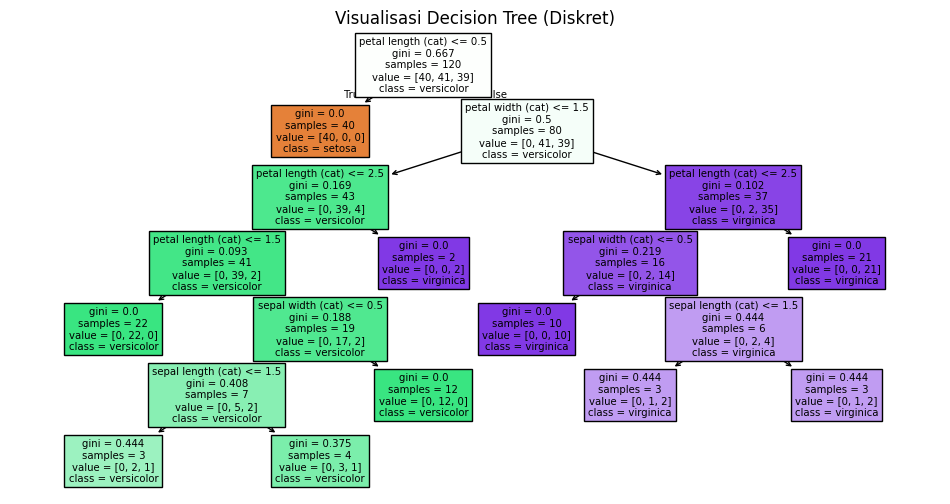

In [12]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.preprocessing import MinMaxScaler, KBinsDiscretizer
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# 1. Load dataset Iris
iris = load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['target'] = iris.target

# 2. Normalisasi fitur numerik
scaler = MinMaxScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df[iris.feature_names]), columns=iris.feature_names)

# 3. Diskritisasi fitur numerik menjadi kategorikal
discretizer = KBinsDiscretizer(n_bins=[4, 3, 4, 3], encode='ordinal', strategy='kmeans')
X_binned = discretizer.fit_transform(df_scaled)

# 4. Gabungkan ke DataFrame baru
feature_names_cat = [
    'sepal length (cat)', 'sepal width (cat)',
    'petal length (cat)', 'petal width (cat)'
]
df_cat = pd.DataFrame(X_binned, columns=feature_names_cat)
df_cat['target'] = df['target']

# 5. Gunakan data diskret langsung (tanpa OrdinalEncoder)
X = df_cat[feature_names_cat]
y = df_cat['target']

# 6. Split data untuk pelatihan dan pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 7. Latih model Decision Tree
model_dt = DecisionTreeClassifier(random_state=42)
model_dt.fit(X_train, y_train)

# 8. Prediksi & evaluasi
y_pred = model_dt.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"📊 Akurasi Decision Tree (kategori hasil KBinsDiscretizer): {accuracy:.4f}")

# 9. Tambahkan prediksi ke DataFrame
df_cat = df_cat.copy()
df_cat['target_predicted'] = model_dt.predict(X)
print(df_cat.head(10))

# 10. Visualisasi pohon keputusan
plt.figure(figsize=(12, 6))
plot_tree(
    model_dt,
    feature_names=feature_names_cat,
    class_names=iris.target_names,
    filled=True
)
plt.title("Visualisasi Decision Tree (Diskret)")
plt.show()

## Evaluasi metode

### Perbandingan Akurasi Naive Bayes dan Decision Tree pada Data Iris: Data Numerik vs Data Diskritisasi (KBinsDiscretizer)

In [9]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, KBinsDiscretizer
from sklearn.naive_bayes import GaussianNB, CategoricalNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Load data Iris
iris = load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['target'] = iris.target

# --- Data Numerik (Kontinu) ---
X_num = df[iris.feature_names].values
y = df['target'].values

# Split data numerik
X_train_num, X_test_num, y_train, y_test = train_test_split(X_num, y, test_size=0.3, random_state=42, stratify=y)

# --- Data Diskret ---
# Normalisasi sebelum diskretisasi
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X_num)

# Diskretisasi (pakai strategi kmeans)
kbd = KBinsDiscretizer(n_bins=[4, 3, 4, 3], encode='ordinal', strategy='kmeans')
X_binned = kbd.fit_transform(X_scaled)

# Split data diskret
X_train_disc, X_test_disc, _, _ = train_test_split(X_binned, y, test_size=0.3, random_state=42, stratify=y)

# --- Modeling ---

# 1. GaussianNB (kontinu)
model_gnb = GaussianNB()
model_gnb.fit(X_train_num, y_train)
y_pred_gnb = model_gnb.predict(X_test_num)
acc_gnb = accuracy_score(y_test, y_pred_gnb)

# 2. Decision Tree (kontinu)
model_dt_num = DecisionTreeClassifier(random_state=42)
model_dt_num.fit(X_train_num, y_train)
y_pred_dt_num = model_dt_num.predict(X_test_num)
acc_dt_num = accuracy_score(y_test, y_pred_dt_num)

# 3. CategoricalNB (diskret)
model_cnb = CategoricalNB()
model_cnb.fit(X_train_disc, y_train)
y_pred_cnb = model_cnb.predict(X_test_disc)
acc_cnb = accuracy_score(y_test, y_pred_cnb)

# 4. Decision Tree (diskret)
model_dt_disc = DecisionTreeClassifier(random_state=42)
model_dt_disc.fit(X_train_disc, y_train)
y_pred_dt_disc = model_dt_disc.predict(X_test_disc)
acc_dt_disc = accuracy_score(y_test, y_pred_dt_disc)

# --- Output ---
print("📊 Akurasi Model:")
print(f"1. GaussianNB (kontinu):         {acc_gnb:.4f}")
print(f"2. Decision Tree (kontinu):      {acc_dt_num:.4f}")
print(f"3. CategoricalNB (diskret):      {acc_cnb:.4f}")
print(f"4. Decision Tree (diskret):      {acc_dt_disc:.4f}")

# Optional: classification report untuk salah satu model
print("\n📄 Classification Report (Decision Tree Diskret):")
print(classification_report(y_test, y_pred_dt_disc, target_names=iris.target_names))

📊 Akurasi Model:
1. GaussianNB (kontinu):         0.9111
2. Decision Tree (kontinu):      0.9333
3. CategoricalNB (diskret):      0.9333
4. Decision Tree (diskret):      0.9111

📄 Classification Report (Decision Tree Diskret):
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       0.82      0.93      0.88        15
   virginica       0.92      0.80      0.86        15

    accuracy                           0.91        45
   macro avg       0.92      0.91      0.91        45
weighted avg       0.92      0.91      0.91        45



## 📊 **Akurasi Model:**

| Model                          | Akurasi | Penjelasan                                                              |
| ------------------------------ | ------- | ----------------------------------------------------------------------- |
| **1. GaussianNB (kontinu)**    | 0.9111  | Model Naive Bayes berbasis distribusi normal pada data kontinu.         |
| **2. Decision Tree (kontinu)** | 0.9333  | Pohon keputusan yang dilatih dari fitur numerik kontinu.                |
| **3. CategoricalNB (diskret)** | 0.9333  | Naive Bayes khusus data kategorikal (diskret hasil *binning*).          |
| **4. Decision Tree (diskret)** | 0.9111  | Pohon keputusan yang dilatih dari fitur kategorikal hasil diskretisasi. |

> 🔍 **Kesimpulan**:

* Model paling akurat: **Decision Tree (kontinu)** dan **CategoricalNB (diskret)**, dengan **akurasi 93.33%**.
* Semua model menunjukkan performa tinggi (>90%), tapi hasilnya sedikit bervariasi tergantung tipe data dan model.

---

## 📄 **Classification Report (Decision Tree Diskret):**

```
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       0.82      0.93      0.88        15
   virginica       0.92      0.80      0.86        15

    accuracy                           0.91        45
   macro avg       0.92      0.91      0.91        45
weighted avg       0.92      0.91      0.91        45
```

### Arti dari metrik-metrik tersebut:

| Metrik        | Arti                                                                                     |
| ------------- | ---------------------------------------------------------------------------------------- |
| **Precision** | Dari semua prediksi kelas X, berapa yang benar.                                          |
| **Recall**    | Dari semua data asli kelas X, berapa yang berhasil dikenali.                             |
| **F1-score**  | Rata-rata harmonik dari precision dan recall (semakin tinggi = semakin seimbang & baik). |
| **Support**   | Jumlah data aktual untuk kelas tersebut.                                                 |

---

### 📌 Penafsiran per kelas:

* **Setosa**:

  * Precision, Recall, dan F1 = 1.00 → **sempurna**. Semua prediksi benar.
* **Versicolor**:

  * Recall = 0.93 → sebagian besar berhasil dikenali.
  * Precision = 0.82 → ada beberapa kesalahan klasifikasi ke versicolor.
* **Virginica**:

  * Precision tinggi (0.92), tapi recall hanya 0.80 → model **kurang mengenali semua virginica**.

---

### 🧠 Kesimpulan Umum:

1. **Decision Tree pada data diskret** masih memberikan akurasi tinggi (91.11%), tapi sedikit di bawah versi kontinu (93.33%).
2. **Model bekerja sangat baik pada kelas setosa**, tapi sedikit kesulitan membedakan antara versicolor dan virginica (yang secara morfologi memang lebih mirip).
3. Akurasi tinggi menunjukkan bahwa **diskretisasi dengan KBinsDiscretizer efektif**, terutama jika ingin menggunakan model seperti `CategoricalNB`.
